In [49]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset

In [16]:
root_dir = '../data/ovaskainen23'

train = True
sub_path = "train" if train else "valid"

fnames = []
with open(os.path.join(root_dir, sub_path, 'list.txt'), 'r') as f:
    for line in f:
        fnames.append(line.strip())

In [17]:
fnames.__len__()

7484

In [18]:
images = sorted(
    [os.path.join(root_dir, sub_path, 'image', fname)
     for fname in fnames if fname.endswith('png')])
annotations = sorted(
    [os.path.join(root_dir, sub_path, 'gt', fname)
     for fname in fnames if fname.endswith('png')])

In [50]:
idx = 7453

image = np.array(Image.open(images[idx]).convert('RGB'), dtype=np.uint8)
segmentation_map = np.array(Image.open(annotations[idx]).convert('L'), dtype=np.uint8)

# randomly crop + pad both image and segmentation map to same size
encoded_inputs = Dataset.image_processor(image, segmentation_map,
                                      return_tensors="pt")

for k, v in encoded_inputs.items():
    encoded_inputs[k].squeeze_()  # remove batch dimension

encoded_inputs

AttributeError: type object 'Dataset' has no attribute 'image_processor'

In [24]:
import matplotlib.pyplot as plt

In [37]:
for i, x in enumerate(images):
    if '9_16' in x: print(i, images[i])

567 ../data/ovaskainen23/train/image/KB2_19_16.png
1203 ../data/ovaskainen23/train/image/KB2_9_16.png
2447 ../data/ovaskainen23/train/image/KB3_19_16.png
2678 ../data/ovaskainen23/train/image/KB3_29_16.png
2961 ../data/ovaskainen23/train/image/KB3_39_16.png
5398 ../data/ovaskainen23/train/image/KB3_9_16.png
5623 ../data/ovaskainen23/train/image/KB7_19_16.png
5834 ../data/ovaskainen23/train/image/KB7_29_16.png
5988 ../data/ovaskainen23/train/image/KB7_39_16.png
6123 ../data/ovaskainen23/train/image/KB7_9_16.png
6619 ../data/ovaskainen23/train/image/KL5_19_16.png
7453 ../data/ovaskainen23/train/image/KL5_9_16.png


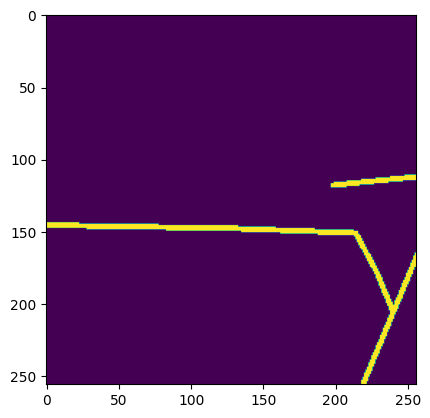

In [40]:
plt.imshow(Image.open(annotations[7453]).convert('L'))

In [36]:
images[4007]

'../data/ovaskainen23/train/image/KB3_66_33.png'

In [47]:
np.array(Image.open(annotations[7453]).convert('L'), dtype=np.uint8).min()

0